In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('baseball.csv')

In [3]:
# Dataset available for analysis
dt

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [4]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (30, 17)


In [5]:
# Dataframe columns
dt.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column W has [ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79] unique elements
****************************************************************************************************
This column R has [724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737] unique elements
****************************************************************************************************
This column AB has [5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572] unique elements
****************************************************************************************************
This column H has [1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479] unique elements
************************************************

In [7]:
# Seeing for the null values in the dataset
dt.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
# The data analysis is done by describe function.
dt.describe().T

count         mean         std      min        25%       50%      75%  \
W     30.0    80.966667   10.453455    63.00    74.0000    81.000    87.75   
R     30.0   688.233333   58.761754   573.00   651.2500   689.000   718.25   
AB    30.0  5516.266667   70.467372  5385.00  5464.0000  5510.000  5570.00   
H     30.0  1403.533333   57.140923  1324.00  1363.0000  1382.500  1451.50   
2B    30.0   274.733333   18.095405   236.00   262.2500   275.500   288.75   
3B    30.0    31.300000   10.452355    13.00    23.0000    31.000    39.00   
HR    30.0   163.633333   31.823309   100.00   140.2500   158.500   177.00   
BB    30.0   469.100000   57.053725   375.00   428.2500   473.000   501.25   
SO    30.0  1248.200000  103.759470   973.00  1157.5000  1261.500  1311.50   
SB    30.0    83.500000   22.815225    44.00    69.0000    83.500    96.50   
RA    30.0   688.233333   72.108005   525.00   636.2500   695.500   732.50   
ER    30.0   635.833333   70.140786   478.00   587.2500   644.500   679.25   
ERA   30.0     3.956333    0.454089     2.94     3.6825     4.025     4.22   
CG    30.0     3.466667    2.763473     0.00     1.0000     3.000     5.75   
SHO   30.0    11.300000    4.120177     4.00     9.0000    12.000    13.00   
SV    30.0    43.066667    7.869335    28.00    37.2500    42.000    46.75   
E     30.0    94.333333   13.958889    75.00    86.0000    91.000    96.75   

         max  
W     100.00  
R     891.00  
AB   5649.00  
H    1515.00  
2B    308.00  
3B     49.00  
HR    232.00  
BB    570.00  
SO   1518.00  
SB    134.00  
RA    844.00  
ER    799.00  
ERA     5.04  
CG     11.00  
SHO    21.00  
SV     62.00  
E     126.00

In [10]:
# To find the correlection in the dataset
dt.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

<AxesSubplot:>

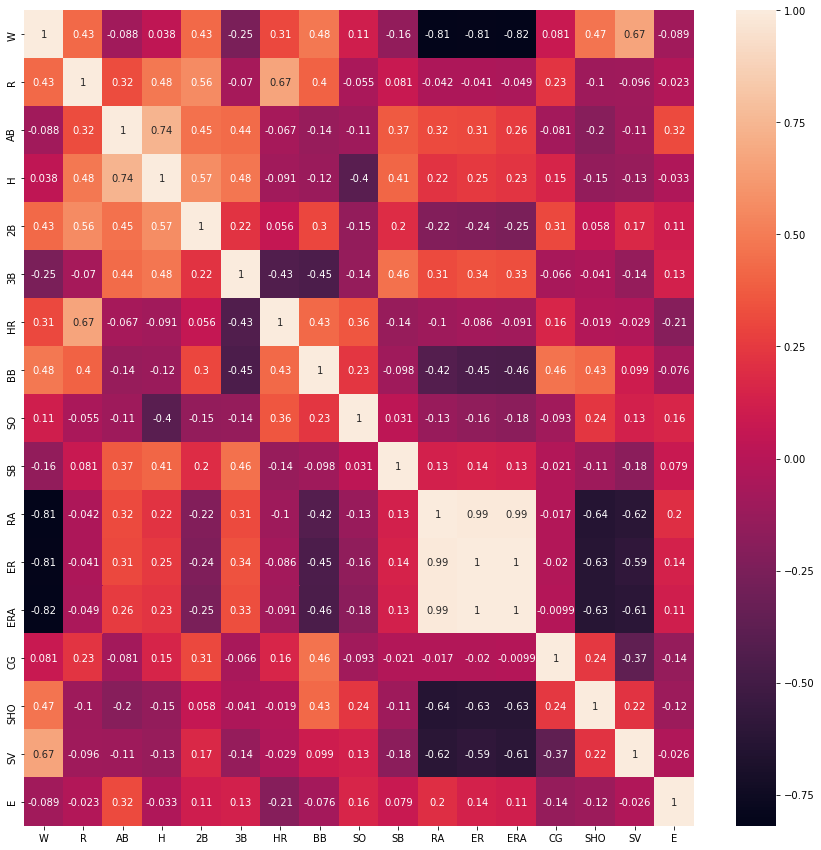

In [11]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [12]:
# Survived corr has been hilighted
e['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<AxesSubplot:>

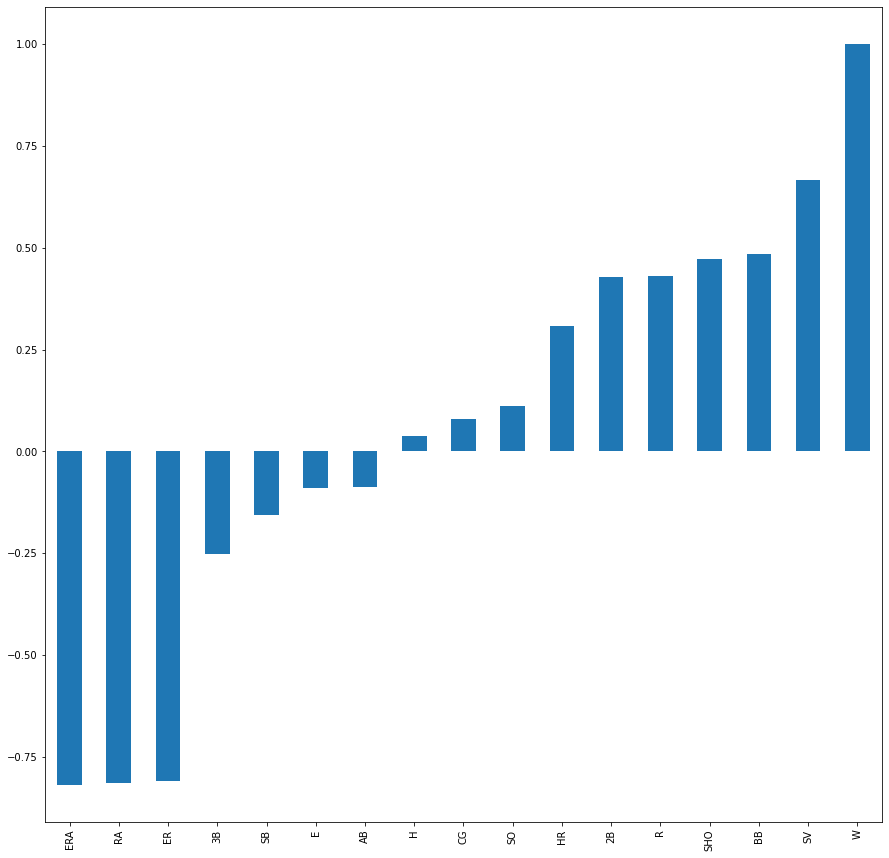

In [13]:
e['W'].sort_values().plot(kind='bar',figsize=(15,15))

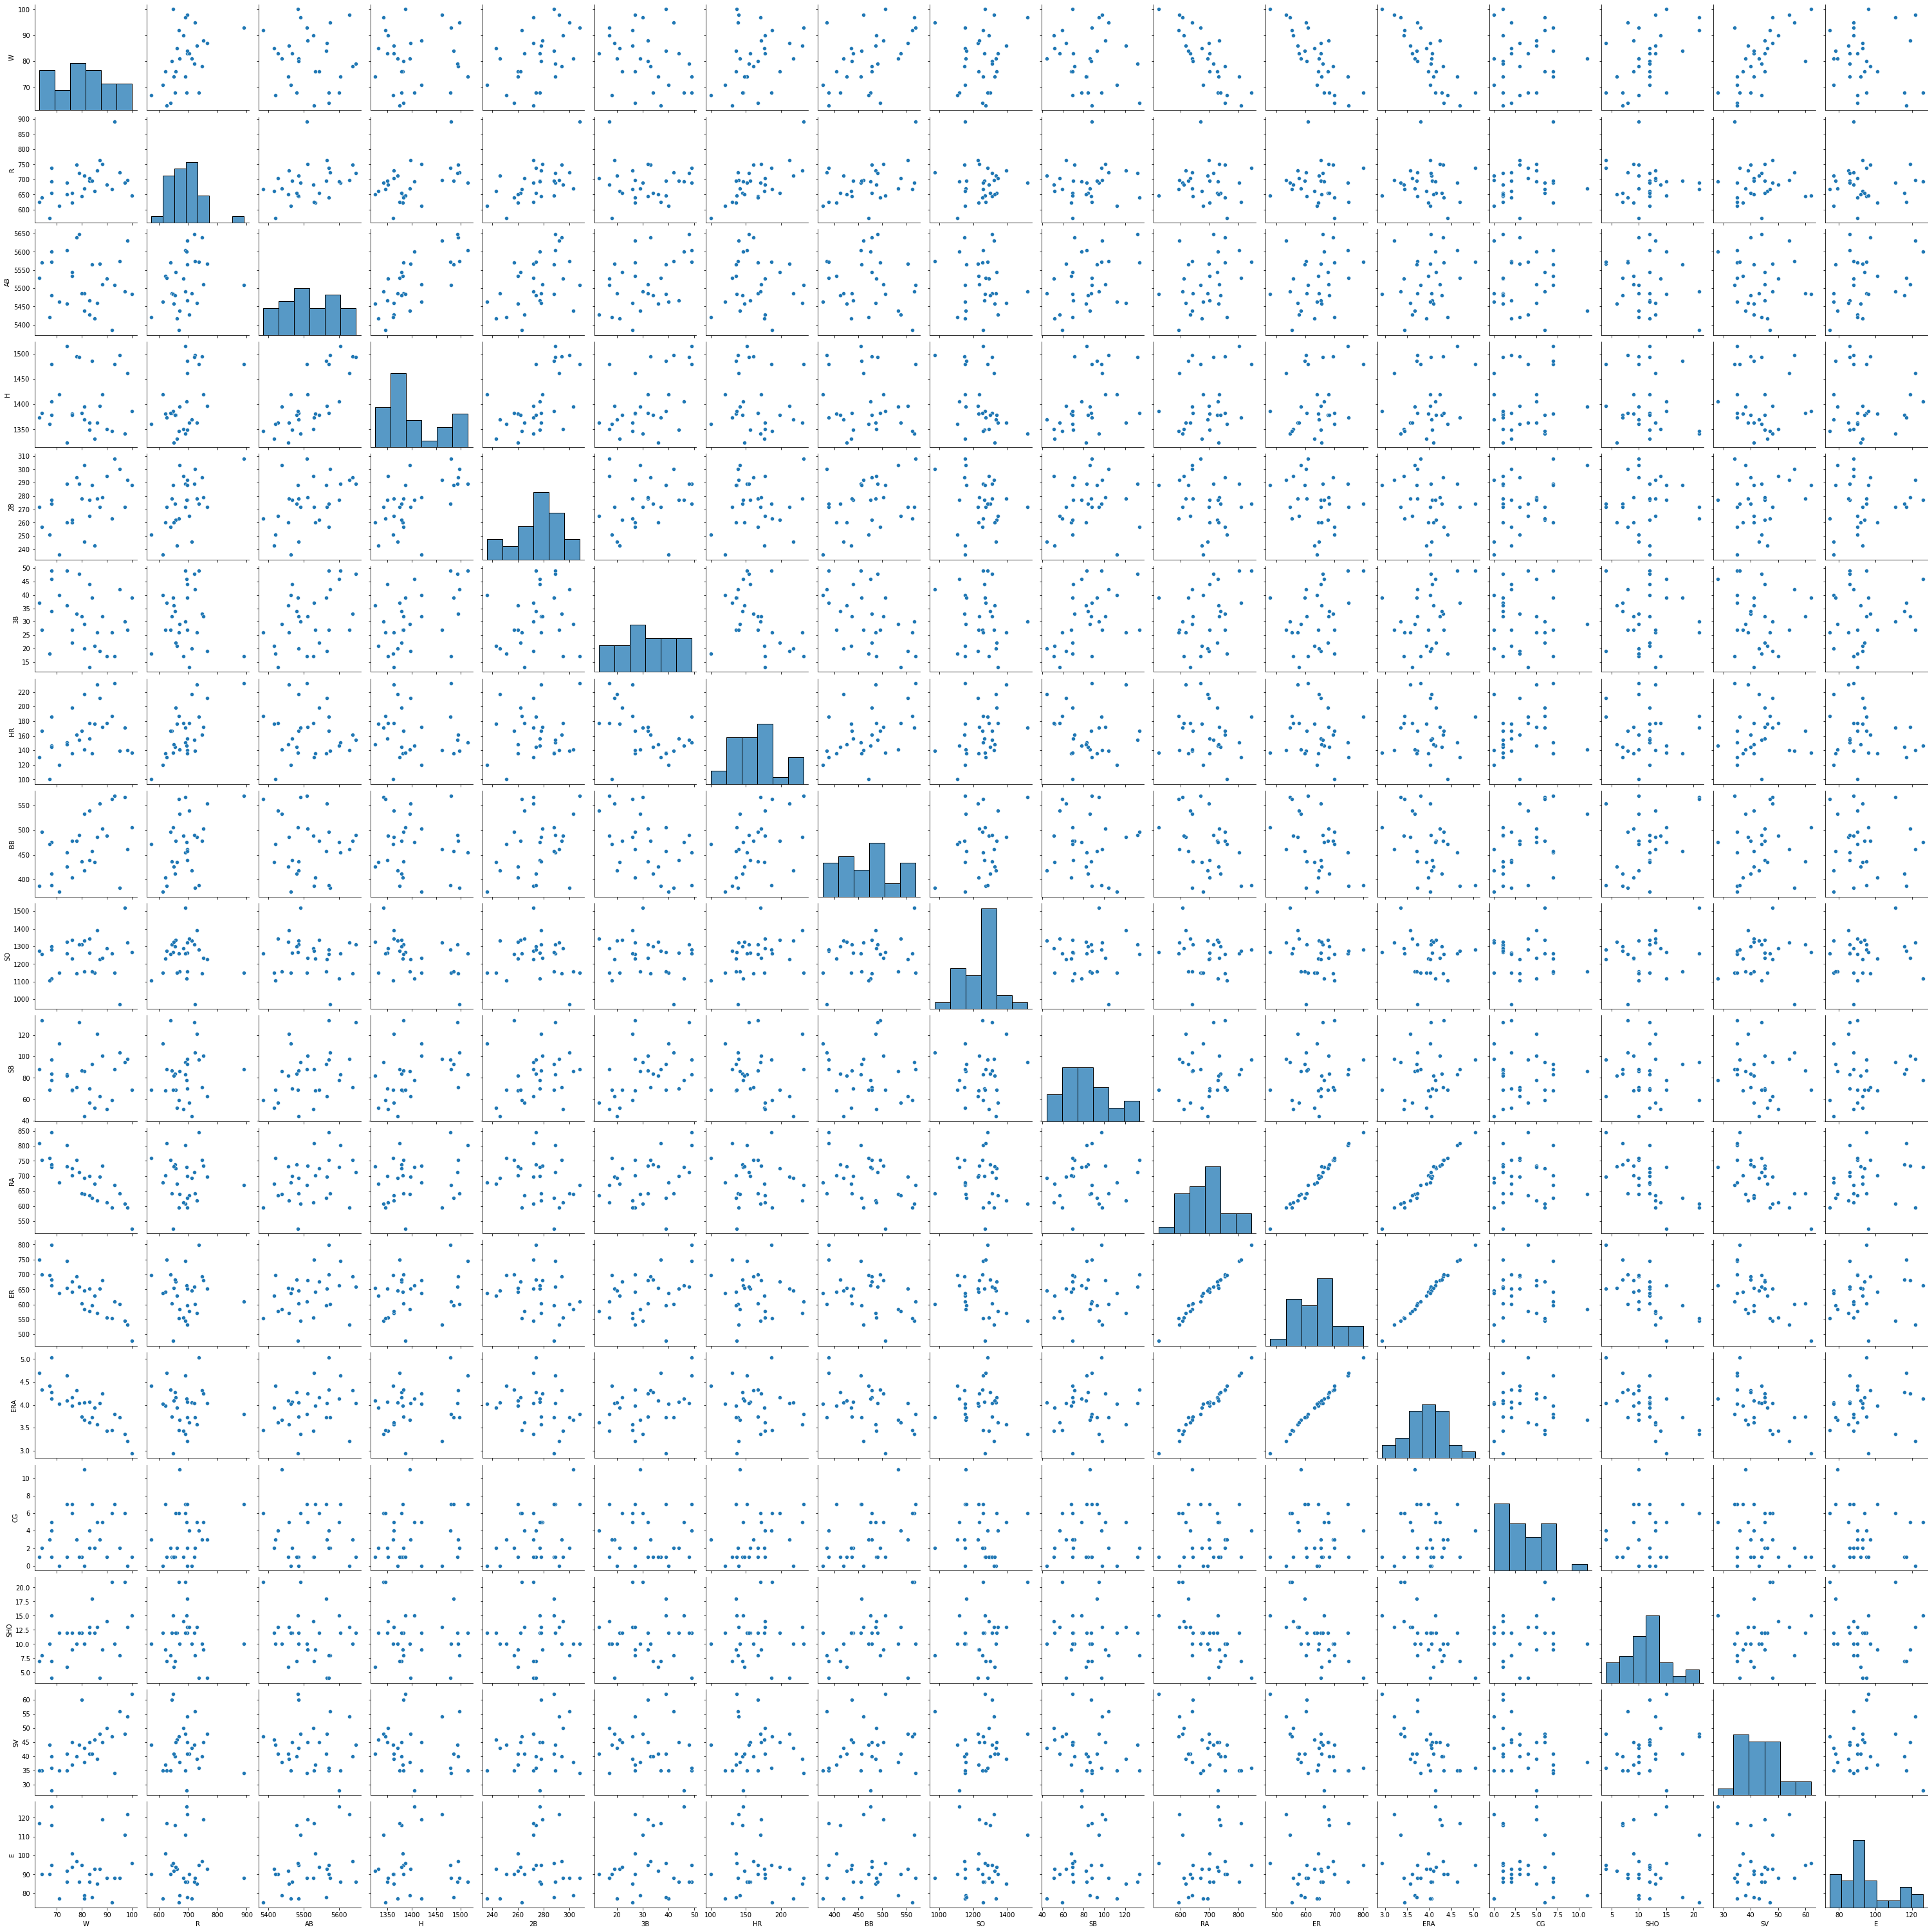

In [14]:
# Observing the relationship using pairplot
sns.pairplot(dt)

In [15]:
# Finding unique elements
dt.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

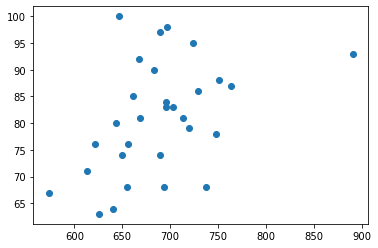

In [16]:
plt.scatter(dt['R'],dt['W'])

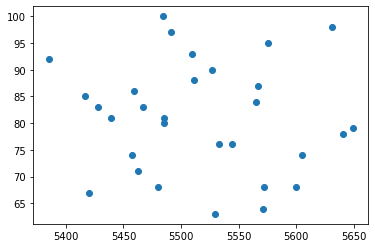

In [17]:
plt.scatter(dt['AB'],dt['W'])

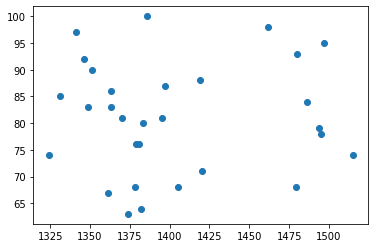

In [18]:
plt.scatter(dt['H'],dt['W'])

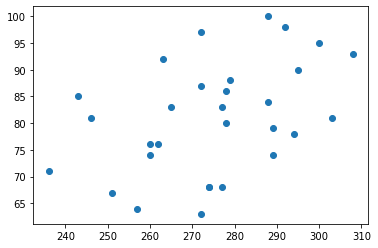

In [19]:
plt.scatter(dt['2B'],dt['W'])

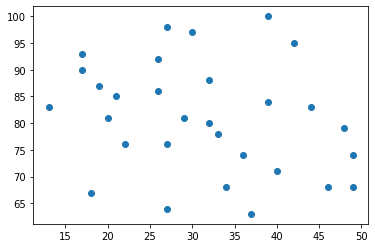

In [20]:
plt.scatter(dt['3B'],dt['W'])

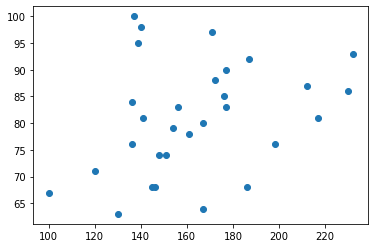

In [21]:
plt.scatter(dt['HR'],dt['W'])

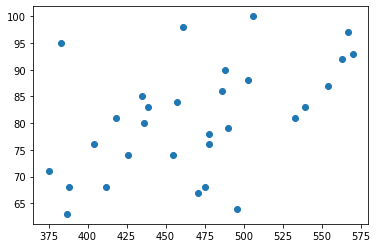

In [22]:
plt.scatter(dt['BB'],dt['W'])

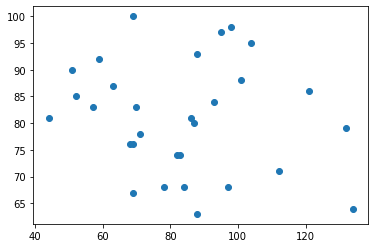

In [23]:
plt.scatter(dt['SB'],dt['W'])

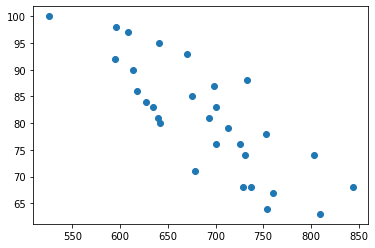

In [24]:
plt.scatter(dt['RA'],dt['W'])

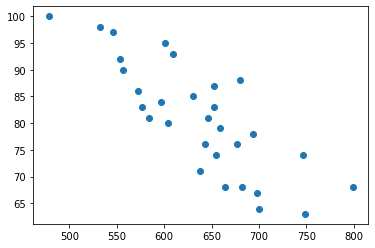

In [25]:
plt.scatter(dt['ER'],dt['W'])

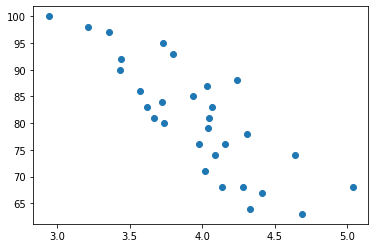

In [26]:
plt.scatter(dt['ERA'],dt['W'])

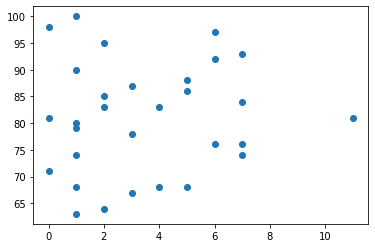

In [27]:
plt.scatter(dt['CG'],dt['W'])

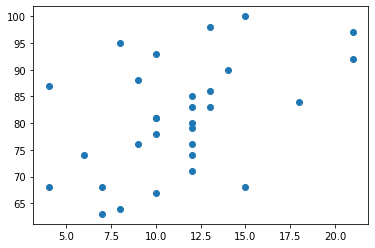

In [28]:
plt.scatter(dt['SHO'],dt['W'])

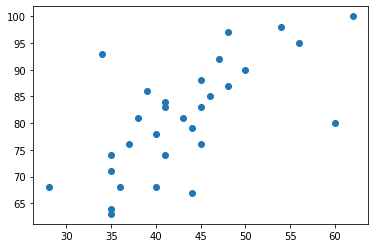

In [29]:
plt.scatter(dt['SV'],dt['W'])

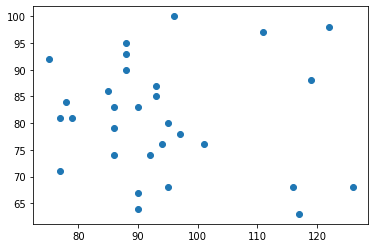

In [30]:
plt.scatter(dt['E'],dt['W'])

In [31]:
dt.drop(columns=['ER', 'ERA'], inplace=True)

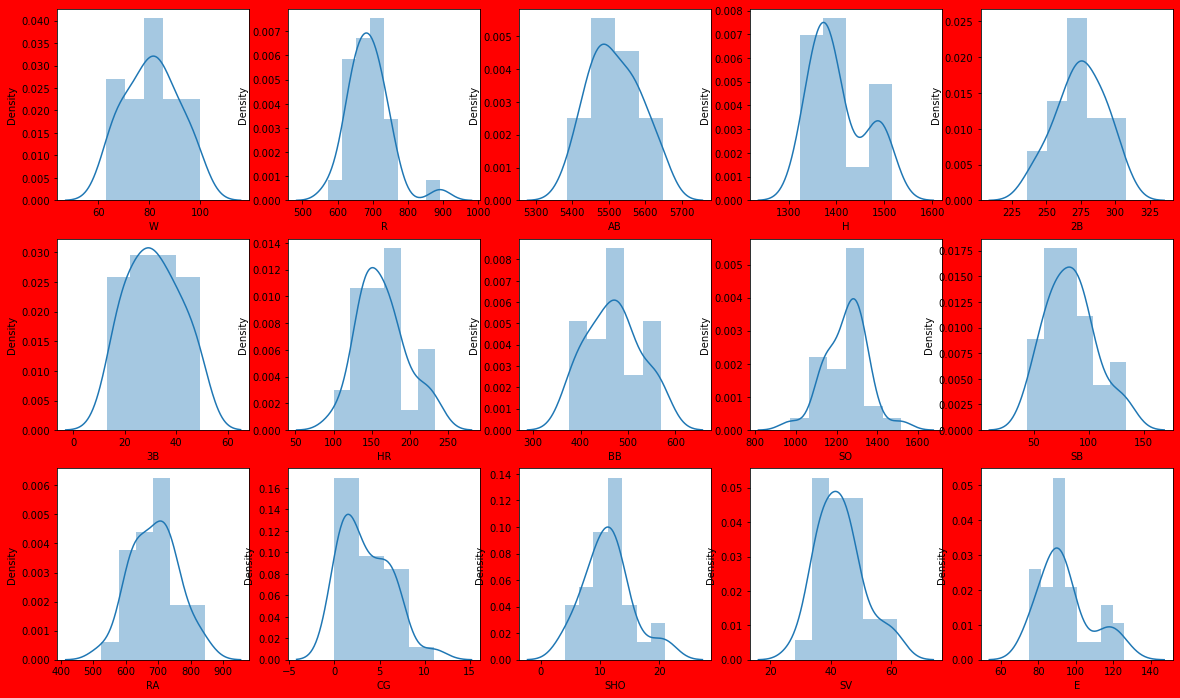

In [32]:
# Analyzing the distribution of every column 
plt.figure(figsize=(20,50), facecolor='red')
plotnumber=1

for column in dt:
    if plotnumber<=17:
        ax=plt.subplot(12,5,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

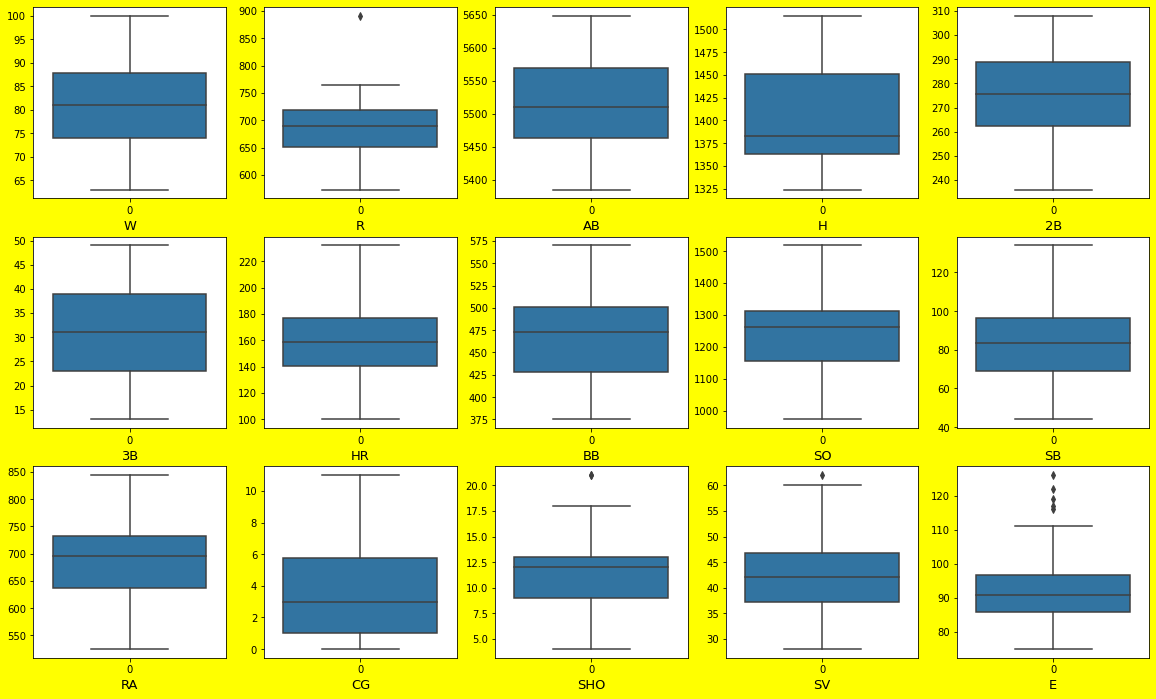

In [33]:
# Visualization using box plot
plt.figure(figsize=(20,50), facecolor='yellow')
plot=1
for column in dt:
    if plot<=17:
        plt.subplot(12,5,plot)
        ax=sns.boxplot(data=dt[column])
        plt.xlabel(column,fontsize=13)
    plot+=1
plt.show()

In [34]:
dt.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:ylabel='Density'>

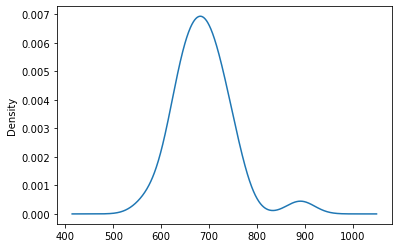

In [35]:
dt['R'].plot(kind='kde')

<AxesSubplot:>

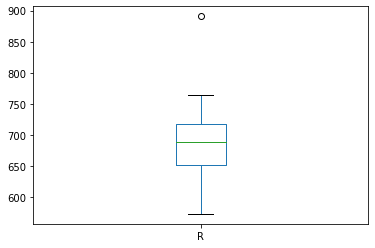

In [36]:
dt['R'].plot(kind='box')

In [37]:
dt['R'].mean()

688.2333333333333

In [38]:
dt['R'].median()

689.0

In [39]:
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [40]:
# Validating one outlier
R_high=(q3.R+(1.5*iqr.R))
R_high

818.75

In [41]:
# Check the indexes
index=np.where(dt['R']>R_high)
index

(array([5], dtype=int64),)

In [42]:
dt['R'].loc[index]=dt['R'].median()

<AxesSubplot:>

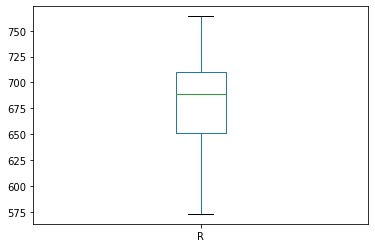

In [43]:
dt['R'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

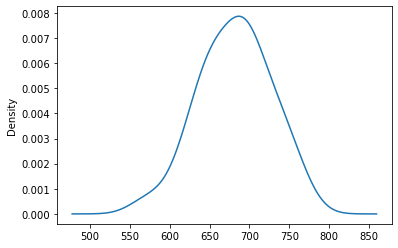

In [44]:
dt['R'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

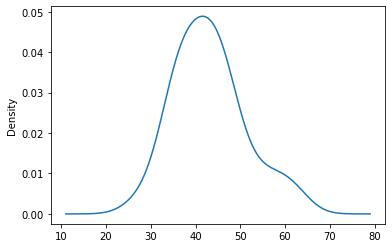

In [45]:
dt['SV'].plot(kind='kde')

<AxesSubplot:>

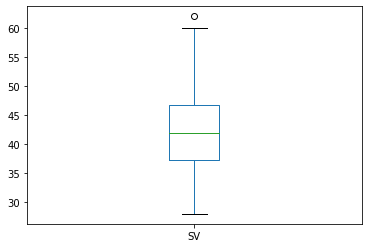

In [46]:
dt['SV'].plot(kind='box')

In [47]:
# Validating one outlier
SV_high=(q3.SV+(1.5*iqr.SV))
SV_high

61.0

In [48]:
# Check the indexes
index=np.where(dt['SV']>SV_high)
index

(array([15], dtype=int64),)

In [49]:
dt['SV'].loc[index]=dt['SV'].median()

<AxesSubplot:ylabel='Density'>

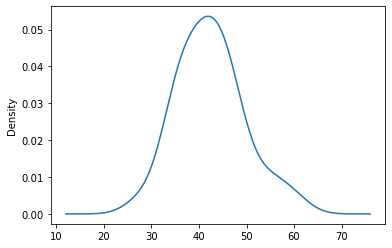

In [50]:
dt['SV'].plot(kind='kde')

<AxesSubplot:>

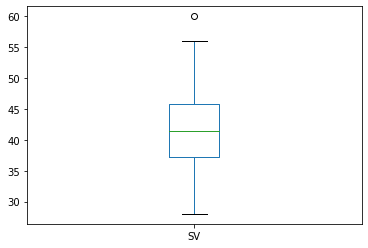

In [51]:
dt['SV'].plot(kind='box')

In [52]:
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [53]:
# Validating one outlier
SV_high=(q3.SV+(1.5*iqr.SV))
SV_high

58.5

In [54]:
# Check the indexes
index=np.where(dt['SV']>SV_high)
index

(array([8], dtype=int64),)

In [55]:
dt['SV'].loc[index]=dt['SV'].median()

<AxesSubplot:ylabel='Density'>

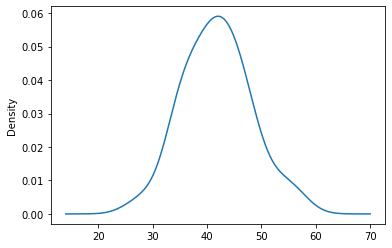

In [56]:
dt['SV'].plot(kind='kde')

<AxesSubplot:>

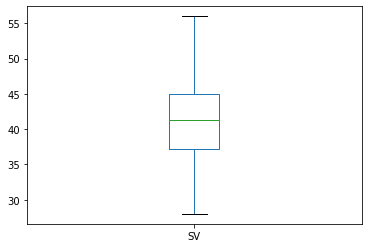

In [57]:
dt['SV'].plot(kind='box')

In [58]:
# Validating one outlier
SHO_high=(q3.SHO+(1.5*iqr.SHO))
SHO_high

19.0

In [59]:
# Check the indexes
index=np.where(dt['SHO']>SHO_high)
index

(array([17, 25], dtype=int64),)

In [60]:
dt['SHO'].loc[index]=dt['SHO'].median()

<AxesSubplot:ylabel='Density'>

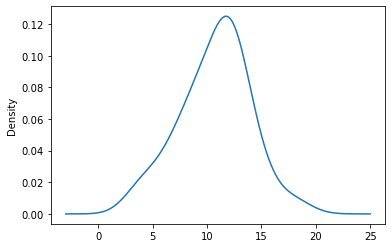

In [61]:
dt['SHO'].plot(kind='kde')

<AxesSubplot:>

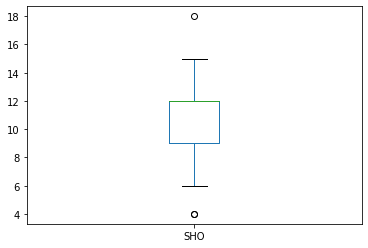

In [62]:
dt['SHO'].plot(kind='box')

In [63]:
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [64]:
# Validating one outlier
SHO_high=(q3.SHO+(1.5*iqr.SHO))
SHO_high

16.5

In [65]:
# Check the indexes
index=np.where(dt['SHO']>SHO_high)
index

(array([26], dtype=int64),)

In [66]:
dt['SHO'].loc[index]=dt['SHO'].median()

In [67]:
# Validating one outlier
SHO_low=(q3.SHO-(1.5*iqr.SHO))
SHO_low

7.5

In [68]:
# Check the indexes
index=np.where(dt['SHO']<SHO_low)
index

(array([ 6, 18, 24, 28, 29], dtype=int64),)

In [69]:
dt['SHO'].loc[index]=dt['SHO'].median()

<AxesSubplot:ylabel='Density'>

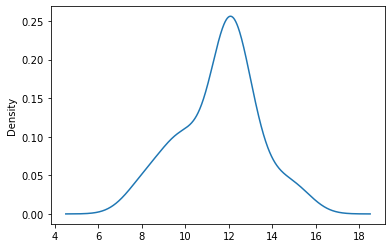

In [70]:
dt['SHO'].plot(kind='kde')

<AxesSubplot:>

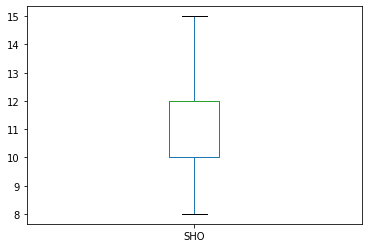

In [71]:
dt['SHO'].plot(kind='box')

In [72]:
# Validating one outlier
E_high=(q3.E+(1.5*iqr.E))
E_high

112.875

In [73]:
# Check the indexes
index=np.where(dt['E']>E_high)
index

(array([10, 14, 16, 18, 24], dtype=int64),)

In [74]:
dt['E'].loc[index]=dt['E'].mean()

<AxesSubplot:ylabel='Density'>

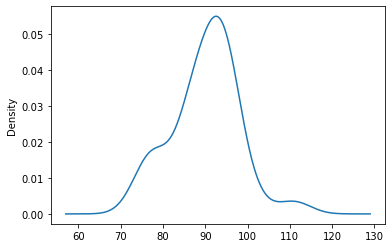

In [75]:
dt['E'].plot(kind='kde')

<AxesSubplot:>

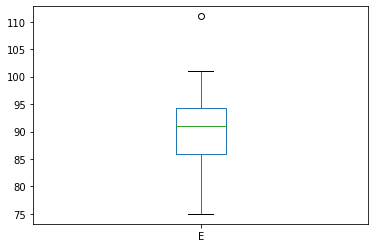

In [76]:
dt['E'].plot(kind='box')

In [77]:
# Validating one outlier
E_small=(q3.E-(1.5*iqr.E))
E_small

80.625

In [78]:
# Check the indexes
index=np.where(dt['E']<E_small)
index

(array([ 2,  7, 22, 25, 26], dtype=int64),)

In [79]:
dt['E'].loc[index]=dt['E'].mean()

<AxesSubplot:>

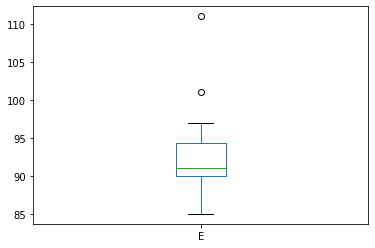

In [80]:
dt['E'].plot(kind='box')

In [81]:
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [82]:
# Validating one outlier
E_high=(q3.E+(1.5*iqr.E))
E_high

100.83333333333331

In [83]:
# Check the indexes
index=np.where(dt['E']>E_high)
index

(array([ 3, 17], dtype=int64),)

In [84]:
dt['E'].loc[index]=dt['E'].mean()

<AxesSubplot:ylabel='Density'>

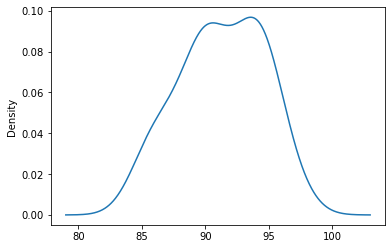

In [85]:
dt['E'].plot(kind='kde')

<AxesSubplot:>

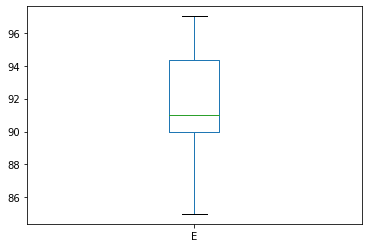

In [86]:
dt['E'].plot(kind='box')

In [87]:
# Using SelectKBest feature selection method
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [88]:
# Assignment of X and y
X=dt.drop('W', axis=1)
y=dt.W

In [89]:
best_features= SelectKBest(score_func=f_classif, k=14)
fit= best_features.fit(X,y)
dt_scores= pd.DataFrame(fit.scores_)
dt_columns= pd.DataFrame(X.columns)

feature_scores=pd.concat([dt_columns, dt_scores], axis=1)
feature_scores.columns= ['Feature_name', 'Score']
print (feature_scores.nlargest (14, 'Score'))

   Feature_name     Score
8            SB  3.145176
13            E  2.659634
9            RA  2.420967
0             R  2.380108
11          SHO  1.858498
12           SV  1.724569
1            AB  1.552727
7            SO  1.509218
6            BB  1.048384
5            HR  0.989166
3            2B  0.904863
4            3B  0.850035
2             H  0.763151
10           CG  0.383449


In [90]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    return(vif)
X = dt.iloc[:,:-1]
calc_vif(X)

variables       VIF
0          W  3.692948
1          R  3.451376
2         AB  4.302730
3          H  2.383766
4         2B  3.666443
5         3B  3.553502
6         HR  2.656270
7         BB  2.062678
8         SO  2.199639
9         SB  2.488834
10        RA  2.110817
11        CG  2.357049
12       SHO  2.466048
13        SV  1.281172

In [92]:
# Importing PCA components
from sklearn.decomposition import PCA

In [93]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 3.22129632e+00, -5.34487577e-01, -8.71179287e-02,
         4.00933409e+00,  1.13054929e+00,  8.64141766e-01,
        -6.08176425e-01, -4.21267385e-01, -7.53432282e-01,
        -2.88571464e-01, -7.89602776e-02,  3.15657778e-01,
         3.78664684e-02, -2.55308905e-01],
       [-3.18919875e-01,  3.83646119e-01,  4.50985209e-01,
         3.24797396e-01, -3.18759630e-01,  1.20591710e+00,
        -1.67009129e+00, -1.10997886e+00,  1.27656010e-01,
         1.27051736e-01, -8.47236354e-01, -5.40952999e-02,
         4.92143954e-01, -2.01903677e-01],
       [-3.81333693e-02, -1.31608302e+00, -2.81225994e+00,
         7.84143262e-01, -1.91896936e+00, -7.50997044e-01,
         4.56821745e-01, -8.12830383e-01, -3.66625833e-01,
        -4.25818294e-01, -4.46290974e-01,  2.27866743e-01,
         9.52494891e-02,  3.35433338e-01],
       [-1.21386557e-01,  1.75988695e+00, -1.78797032e+00,
         1.77883557e-01,  1.58529852e-01, -5.91328880e-01,
         5.06594763e-01, -6.18741340e-01,  4.

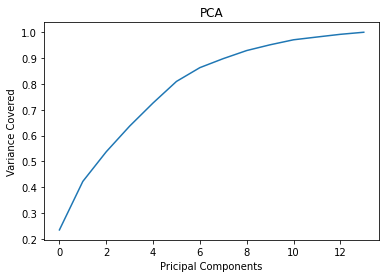

In [94]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [95]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [96]:
prin_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   3.221296 -0.534488 -0.087118  4.009334  1.130549  0.864142 -0.608176   
1  -0.318920  0.383646  0.450985  0.324797 -0.318760  1.205917 -1.670091   
2  -0.038133 -1.316083 -2.812260  0.784143 -1.918969 -0.750997  0.456822   
3  -0.121387  1.759887 -1.787970  0.177884  0.158530 -0.591329  0.506595   
4   3.122818 -0.398602 -0.883298 -1.179839 -0.906013  0.182152 -1.342593   
5   0.400260 -3.130314 -2.623298 -0.304325 -0.033748 -0.339560 -0.227087   
6  -0.900750 -2.306389  0.608197 -0.208848  1.829567 -1.058275 -0.162974   
7  -1.986189  0.285096  0.316140 -0.491691  2.743679  0.423012 -1.187739   
8  -0.662630  0.855507  1.054259 -0.012902 -0.264509 -0.111971  0.732218   
9   2.545782 -0.860854  0.290564  0.124008  1.492563 -2.292939  0.490811   
10  0.867112 -1.081945 -0.608581 -0.003799  1.334532 -0.258955  1.105583   
11 -1.123534 -2.231317 -0.129468 -1.581906 -0.532637  2.568104 -0.605398   
12 -2.565723  1.492635 -0.085221  0.724717  1.069572 -0.647612 -0.893809   
13 -1.256021 -0.228481 -0.093806 -0.977940  0.809909 -0.739459  0.586512   
14  1.676482  0.717546  0.322886 -1.626472 -1.669620 -2.031752 -0.927539   
15 -1.136368  0.130453  2.234122  0.744823 -2.425874 -1.256276  0.364924   
16  0.774276 -0.990987  2.906660  1.555246  0.023009 -0.052934  1.365733   
17 -2.009363 -1.668539  0.720874 -0.845939 -0.872113  0.865602  1.847964   
18 -0.109332  1.730222  0.784574 -0.404601  0.045123 -0.186596  0.297754   
19  0.827279  1.003203 -1.617955 -0.780735  0.948657  1.808736  1.911276   
20 -2.002448 -1.379084  1.503294  1.080916 -0.198941 -0.009043 -1.053102   
21 -2.857604 -1.094421 -0.149467 -0.483839 -0.154660 -0.234927 -0.388597   
22  0.564990  3.570140 -0.085608  0.306868 -0.755438  1.364645 -0.353761   
23 -1.494756  2.920826 -2.021600  1.739734 -0.044842 -0.119702  0.302423   
24  0.795080  2.862031  0.421426 -0.999174 -0.067420 -0.351336  0.313725   
25 -3.032335 -1.085343 -0.810898  0.513929 -0.690614 -0.076082 -0.291961   
26  1.882976 -0.761813 -0.371134  0.871225 -1.362032 -0.377754 -0.275423   
27  3.147595 -1.190455  1.292679 -0.214477 -0.431357  2.204007  0.161488   
28 -1.045655  1.985037  0.623797 -0.602072 -0.014623  0.603152 -0.000025   
29  2.835198  0.562887  0.637229 -2.239067  1.076481 -0.601971 -0.455552   

         PC8       PC9      PC10      PC11      PC12      PC13  
0  -0.421267 -0.753432 -0.288571 -0.078960  0.315658  0.037866  
1  -1.109979  0.127656  0.127052 -0.847236 -0.054095  0.492144  
2  -0.812830 -0.366626 -0.425818 -0.446291  0.227867  0.095249  
3  -0.618741  0.496577 -0.806555  1.097735  0.262561  0.813202  
4  -0.732817  1.381159  0.106167  0.428513 -0.560436 -0.193225  
5   1.754964  0.086280 -0.858006 -0.381969 -0.445894 -0.360610  
6   0.350283  0.053049  1.121358 -0.130892  0.330996  0.014501  
7   0.114115 -0.034566 -0.518295  0.564697 -0.671505  0.696282  
8   0.342995 -0.514947 -1.012823 -0.163754 -0.251317 -0.102528  
9   0.258670  0.015003  0.085085 -0.272246 -0.388853  0.375019  
10 -0.866164 -1.011059  0.470189 -0.574143 -0.048718 -0.108452  
11  0.408425 -0.885453 -0.561860  0.124407  0.745477 -0.215629  
12  0.141716 -0.699003  0.391894  0.268726  0.360722 -0.316396  
13 -0.407334  0.663839 -0.188245  0.856304  0.561619 -0.540283  
14  0.736579 -0.378360  0.880089 -0.075462  0.770704  0.578923  
15  0.590421 -0.684735 -0.159636 -0.124377 -0.602324  0.291985  
16  0.375607  0.664233 -0.206049  0.611242  0.172547 -0.339673  
17 -1.368668  0.100141  0.347390  0.264507 -0.168963  0.213788  
18 -0.188334 -0.074580 -0.625135 -0.632279 -0.118617 -0.303602  
19  1.179073  0.170221  0.430023 -0.288646  0.192270  0.650779  
20  0.479456  1.408465 -0.515827 -0.447577  0.556270  0.128515  
21  0.284064  0.283624  0.357393  0.107811 -0.399710 -0.073822  
22  1.095987 -0.949875  0.499865  0.842966 -0.289994 -0.228689  
23  0.175592  1.194734  0.816199 -0.393104 -0.084927 -0.650429  
24  0.029565  0.565248 -0.6

In [97]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [98]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9475608950151527
At random state, 1, the testing accuracy is :0.0691986825030777


At random state 2, the training accuracy is :0.9066699259378568
At random state, 2, the testing accuracy is :0.41304422172757793


At random state 3, the training accuracy is :0.966915832409068
At random state, 3, the testing accuracy is :0.2441487269345688


At random state 4, the training accuracy is :0.9002532921240045
At random state, 4, the testing accuracy is :0.771416131770136


At random state 5, the training accuracy is :0.9288374760838104
At random state, 5, the testing accuracy is :0.3285563194907517


At random state 6, the training accuracy is :0.9135545560725713
At random state, 6, the testing accuracy is :0.618446730348222


At random state 7, the training accuracy is :0.9545067104393636
At random state, 7, the testing accuracy is :-1.8397227931990319


At random state 8, the training accuracy is :0.9080577066621346
At random state, 8, the tes

In [99]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8640807859898061
At random state, 1, the testing accuracy is :0.6316664826498422


At random state 2, the training accuracy is :0.9040402966993263
At random state, 2, the testing accuracy is :0.31759652722967613


At random state 3, the training accuracy is :0.9355289156400516
At random state, 3, the testing accuracy is :0.3187161878065875


At random state 4, the training accuracy is :0.8551169780245333
At random state, 4, the testing accuracy is :0.11078812903225843


At random state 5, the training accuracy is :0.8610159991175674
At random state, 5, the testing accuracy is :0.6458064137086904


At random state 6, the training accuracy is :0.873233120871153
At random state, 6, the testing accuracy is :0.5212156147540984


At random state 7, the training accuracy is :0.8797752397652958
At random state, 7, the testing accuracy is :0.09467331670822887


At random state 8, the training accuracy is :0.8563850059913455
At random state, 8, the 

In [100]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :1.0
At random state, 1, the testing accuracy is :0.4380914826498423


At random state 2, the training accuracy is :1.0
At random state, 2, the testing accuracy is :0.2517758484609314


At random state 3, the training accuracy is :1.0
At random state, 3, the testing accuracy is :0.03083391730903995


At random state 4, the training accuracy is :1.0
At random state, 4, the testing accuracy is :-0.31354838709677413


At random state 5, the training accuracy is :1.0
At random state, 5, the testing accuracy is :0.42276621787025703


At random state 6, the training accuracy is :1.0
At random state, 6, the testing accuracy is :0.415983606557377


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :-0.3167082294264336


At random state 8, the training accuracy is :1.0
At random state, 8, the testing accuracy is :-0.00374999999999992


At random state 9, the training accuracy is :1.0
At random state, 9, the t

In [101]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9999999972211266
At random state, 1, the testing accuracy is :0.561647835605511


At random state 2, the training accuracy is :0.9999999976305767
At random state, 2, the testing accuracy is :0.13714405522338502


At random state 3, the training accuracy is :0.9999999975976052
At random state, 3, the testing accuracy is :0.44492212032423484


At random state 4, the training accuracy is :0.9999999978236831
At random state, 4, the testing accuracy is :-0.5793816622127328


At random state 5, the training accuracy is :0.9999999965410118
At random state, 5, the testing accuracy is :0.7288864338893621


At random state 6, the training accuracy is :0.999999996878608
At random state, 6, the testing accuracy is :0.34409209858610856


At random state 7, the training accuracy is :0.9999999975324144
At random state, 7, the testing accuracy is :-0.455324036931515


At random state 8, the training accuracy is :0.9999999979054307
At random state, 8, the 

In [102]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9808244592936357
At random state, 1, the testing accuracy is :0.5767070846477391


At random state 2, the training accuracy is :0.9838746689413845
At random state, 2, the testing accuracy is :0.44548563412702025


At random state 3, the training accuracy is :0.9927257252680588
At random state, 3, the testing accuracy is :0.27774585377248295


At random state 4, the training accuracy is :0.9896487404678178
At random state, 4, the testing accuracy is :-0.15536089207487014


At random state 5, the training accuracy is :0.990587463467194
At random state, 5, the testing accuracy is :0.6674622603019177


At random state 6, the training accuracy is :0.9836784191235369
At random state, 6, the testing accuracy is :0.5163727990285367


At random state 7, the training accuracy is :0.9841532933727656
At random state, 7, the testing accuracy is :0.3781878636741476


At random state 8, the training accuracy is :0.9957238623477662
At random state, 8, the

In [103]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-0.3117522732373317
At random state, 1, the testing accuracy is :0.47154574132492055


At random state 2, the training accuracy is :0.2036361904661117
At random state, 2, the testing accuracy is :0.5155801104972374


At random state 3, the training accuracy is :-0.19822281673992093
At random state, 3, the testing accuracy is :0.654968465311843


At random state 4, the training accuracy is :-0.4715040729606228
At random state, 4, the testing accuracy is :0.20216774193548437


At random state 5, the training accuracy is :-0.4582528187547701
At random state, 5, the testing accuracy is :0.691671970624235


At random state 6, the training accuracy is :0.23676364757890467
At random state, 6, the testing accuracy is :0.5033278688524592


At random state 7, the training accuracy is :0.18282922963759185
At random state, 7, the testing accuracy is :-0.0951122194513716


At random state 8, the training accuracy is :-0.30009131579149284
At random state,

In [104]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    gr=GradientBoostingRegressor()
    gr.fit(x_train, y_train)
    predtrain=gr.predict(x_train)
    predtest=gr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9999984461759963
At random state, 1, the testing accuracy is :0.6118344421599022


At random state 2, the training accuracy is :0.999999368042062
At random state, 2, the testing accuracy is :0.38628503333327857


At random state 3, the training accuracy is :0.9999999781154465
At random state, 3, the testing accuracy is :0.21766298229837944


At random state 4, the training accuracy is :0.9999998877491427
At random state, 4, the testing accuracy is :-0.022781802649191274


At random state 5, the training accuracy is :0.9999988680274701
At random state, 5, the testing accuracy is :0.6751188497533288


At random state 6, the training accuracy is :0.9999978844276005
At random state, 6, the testing accuracy is :0.5681046271695372


At random state 7, the training accuracy is :0.9999998391508265
At random state, 7, the testing accuracy is :0.02613586411910085


At random state 8, the training accuracy is :0.9999992150850889
At random state, 8, t

In [105]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-39.29020048017746
At random state, 1, the testing accuracy is :0.10924481312435719


At random state 2, the training accuracy is :-29.522714942140112
At random state, 2, the testing accuracy is :0.026129288981640575


At random state 3, the training accuracy is :-31.11910993119772
At random state, 3, the testing accuracy is :0.11636850474719584


At random state 4, the training accuracy is :-46.38780166502457
At random state, 4, the testing accuracy is :-0.6725869858597495


At random state 5, the training accuracy is :-42.25342913219026
At random state, 5, the testing accuracy is :0.1339613937334928


At random state 6, the training accuracy is :-31.847306921955244
At random state, 6, the testing accuracy is :0.08190356554202827


At random state 7, the training accuracy is :-28.682121278054442
At random state, 7, the testing accuracy is :-0.7586490136938357


At random state 8, the training accuracy is :-31.19957922458901
At random state,

In [106]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=366)
xg=XGBRegressor()
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state 366 the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state 366 the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 366 the training accuracy is :0.9999999976098681
At random state 366 the testing accuracy is :0.9476512730833061


In [107]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators' : [15,16,18,20,25],
           'max_depth':[3,4,5,6,7,8],
           'learning_rate': [0.1, 1, 0.01, 0.05],
           'min_child_weight' : [1, 5, 10,50,75,100],
           'scale_pos_weight' :[1, 2, 4],
           'subsample': [0.8, 0.9, 1.0]}

In [108]:
c=GridSearchCV(XGBRegressor(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 5, 10, 50, 75, 100],
                         'n_estimators': [15, 16, 18, 20, 25],
                         'scale_pos_weight': [1, 2, 4],
                         'subsample': [0.8, 0.9, 1.0]})

In [109]:
c.best_params_

{'learning_rate': 1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 20,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [110]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=366)
xg=XGBRegressor(learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=20,scale_pos_weight=1, subsample=0.9)
xg.fit(x_train, y_train)
predtrain=xg.predict(x_train)
predtest=xg.predict(x_test)
print(f"At random state 366 the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state 366 the testing accuracy is :{r2_score(y_test, predtest)}")

At random state 366 the training accuracy is :0.9999999976098681
At random state 366 the testing accuracy is :0.9476512730833061


In [112]:
mse=mean_absolute_error(y_test, predtest)

In [116]:
rmse=np.sqrt(mse)

In [121]:
print ('The MSE is', mse, 'and RMSE is', rmse)

The mse is 1.5226669311523438 and rmse is 1.2339639099877855


In [123]:
print('The MAE is', mean_absolute_error(y_test, predtest))

The MAE is 1.5226669311523438


In [ ]:
adjr2=1 – [(1-R2)*(n-1)/(n-k-1)]

In [ ]:
#Pickling of the file

In [ ]:
import pickle
filename = 'Baseball Case Study'
outfile = open(filename,'wb')
pickle.dump(Baseball Case Study_dict,outfile)
outfile.close()

In [111]:
# Conclusion